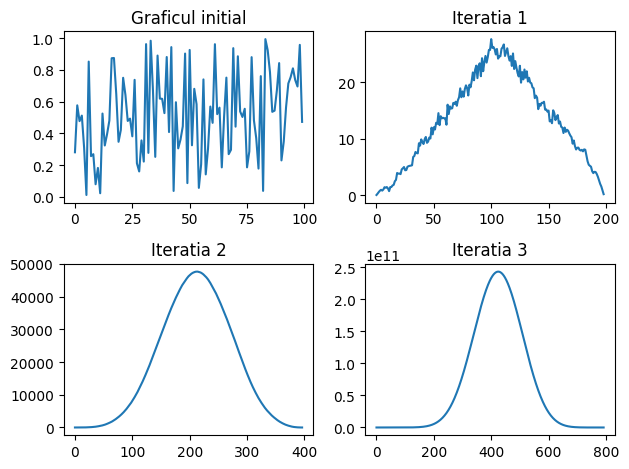

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#1
x = np.random.rand(100)

plt.subplot(2, 2, 1)
plt.plot(x)
plt.title('Graficul initial')

for i in range(3):
    x = np.convolve(x,x)
    
    plt.subplot(2, 2, i + 2)
    plt.plot(x)
    plt.title(f'Iteratia {i + 1}')

plt.tight_layout()
plt.show()


In [21]:
import numpy as np
from numpy.fft import fft, ifft

#2
def convolutie_directa(p, q):
    N = len(p) + len(q) - 1
    rezultat = np.zeros(N, dtype=int)
    for i in range(len(p)):
        for j in range(len(q)):
            rezultat[i + j] += p[i] * q[j]
    return rezultat

def convolutie_fft(p, q):
    N = 2**int(np.ceil(np.log2(len(p) + len(q) - 1)))
    p_extins = np.pad(p, (0, N - len(p)), 'constant')
    q_extins = np.pad(q, (0, N - len(q)), 'constant')

    fft_p = fft(p_extins)
    fft_q = fft(q_extins)

    fft_rezultat = fft_p * fft_q

    rezultat = np.rint(ifft(fft_rezultat).real).astype(int)

    return rezultat[:len(p) + len(q) - 1]

N = 5
p = np.random.randint(-10, 10, N + 1)
q = np.random.randint(-10, 10, N + 1)

rezultat_direct = convolutie_directa(p, q)
rezultat_fft = convolutie_fft(p, q)

print("Coeficienții polinomului rezultat (direct):", rezultat_direct)
print("Coeficienții polinomului rezultat (FFT):", rezultat_fft)


Coeficienții polinomului rezultat (direct): [ -9 -42 -79  62  62  -5 -46  20 -93  30  48]
Coeficienții polinomului rezultat (FFT): [ -9 -42 -79  62  62  -5 -46  20 -93  30  48]


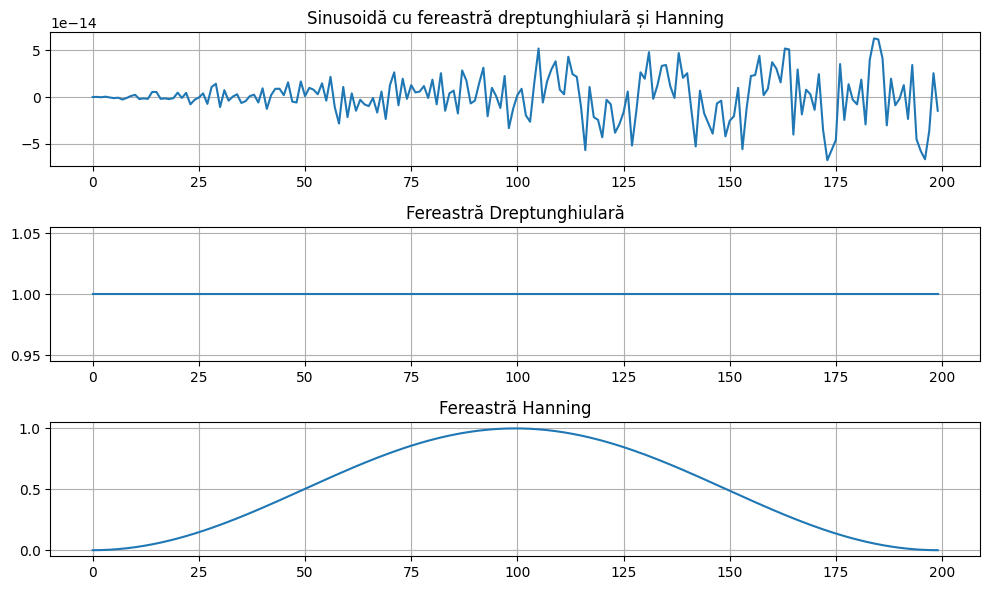

In [23]:
import numpy as np
import matplotlib.pyplot as plt

#3
def fereastra_dreptunghi_functie(Nw):
    return np.ones(Nw)

def fereastra_hanning_functie(Nw):
    return 0.5 * (1 - np.cos(2 * np.pi * np.arange(Nw) / (Nw - 1)))

def afiseaza_sinusoida_si_ferestre(frecventa, amplitudine, faza, Nw):
    timp = np.arange(Nw)
    sinusoida = amplitudine * np.sin(2 * np.pi * frecventa * timp / Nw + faza)

    fereastra_dreptunghi = fereastra_dreptunghi_functie(Nw)
    fereastra_hanning = fereastra_hanning_functie(Nw)

    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(timp, sinusoida)
    plt.title('Sinusoidă cu fereastră dreptunghiulară și Hanning')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(timp, fereastra_dreptunghi)
    plt.title('Fereastră Dreptunghiulară')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(timp, fereastra_hanning)
    plt.title('Fereastră Hanning')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

frecventa = 100
amplitudine = 1
faza = 0

Nw = 200
afiseaza_sinusoida_si_ferestre(frecventa, amplitudine, faza, Nw)


a)     ID            Datetime  Count
0   0 2012-08-25 00:00:00      8
1   1 2012-08-25 01:00:00      2
2   2 2012-08-25 02:00:00      6
3   3 2012-08-25 03:00:00      2
4   4 2012-08-25 04:00:00      2


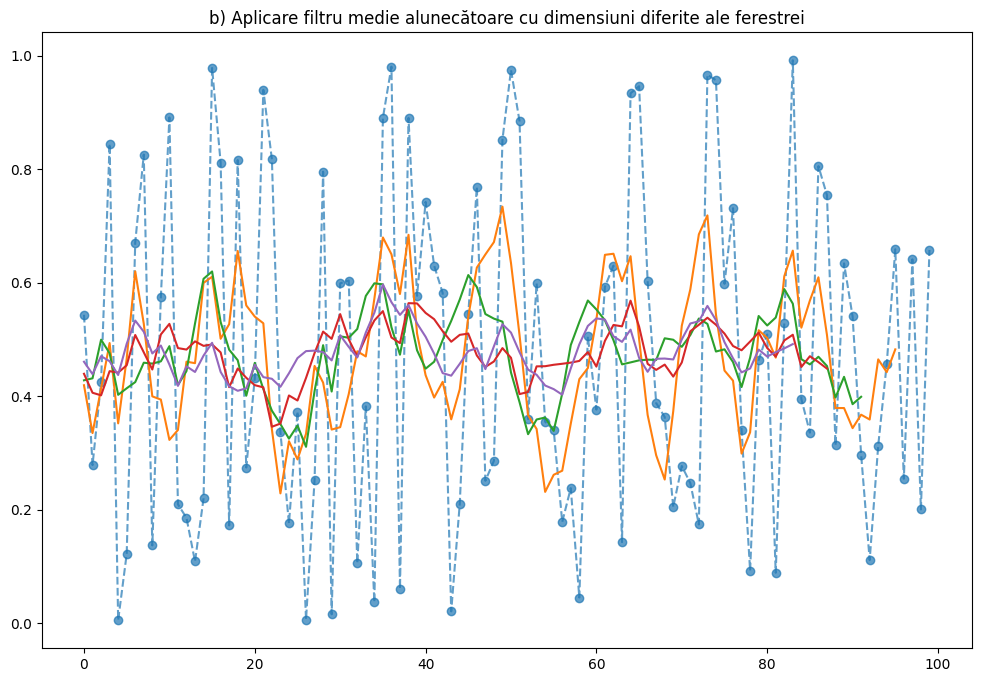

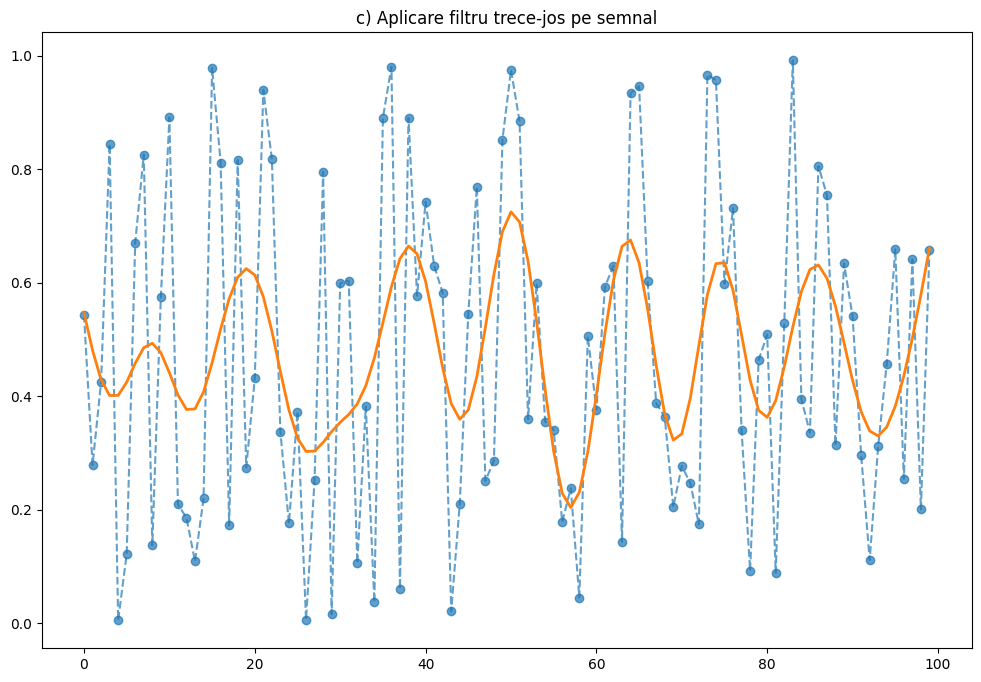

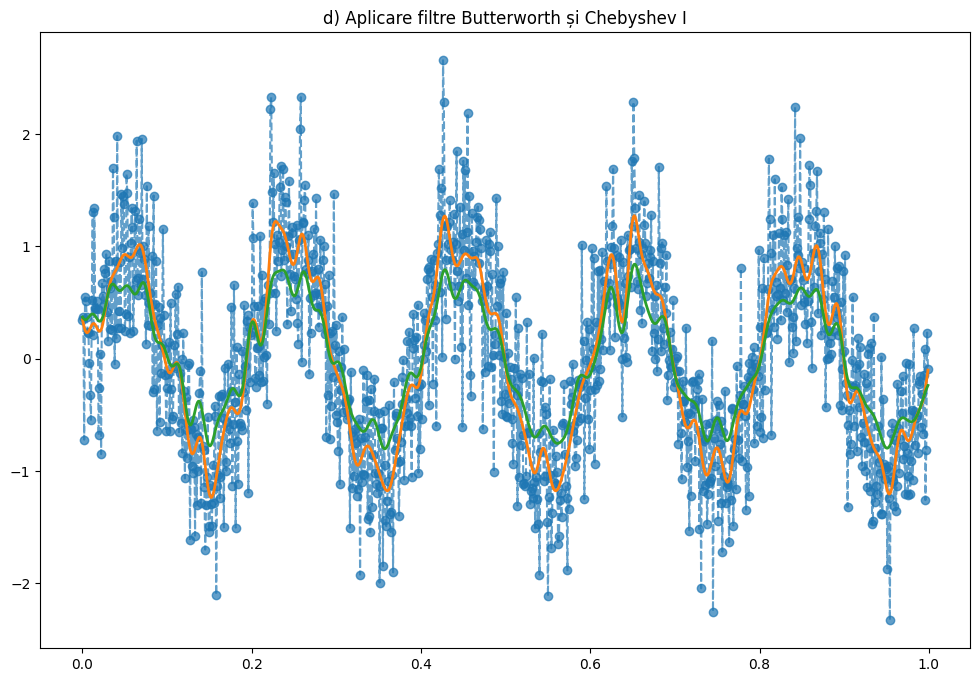

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
#4 
#a
df = pd.read_csv("Train.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])

data_inceput = '25-08-2012 00:00:00'
data_sfarsit = '28-08-2012 23:59:59'

data_3_zile = df[(df['Datetime'] >= data_inceput) & (df['Datetime'] <= data_sfarsit)]

print('a) ', data_3_zile.head())

#b
np.random.seed(100)
semnal = np.random.rand(100)

def aplicare_filtru_medie_alunecatoare(semnal, w):
    filtru_medie = np.ones(w) / w
    semnal_smeared = np.convolve(semnal, filtru_medie, 'valid')
    return semnal_smeared

dimensiuni_ferestre = [5, 9, 13, 17]

plt.figure(figsize=(12, 8))
plt.plot(semnal, alpha=0.7, linestyle='--', marker='o')

for w in dimensiuni_ferestre:
    semnal_smeared = aplicare_filtru_medie_alunecatoare(semnal, w)
    plt.plot(semnal_smeared)

plt.title('b) Aplicare filtru medie alunecătoare cu dimensiuni diferite ale ferestrei')
plt.show()

#c
np.random.seed(100)
semnal = np.random.rand(100)

frecventa_echantionare = 1

frecventa_taiere = 0.1

frecventa_normalizata = frecventa_taiere / (frecventa_echantionare / 2)

b, a = signal.butter(N=4, Wn=frecventa_normalizata, btype='low', analog=False, output='ba')

semnal_filtrat = signal.filtfilt(b, a, semnal)

plt.figure(figsize=(12, 8))
plt.plot(semnal, alpha=0.7, linestyle='--', marker='o')
plt.plot(semnal_filtrat, linestyle='-', linewidth=2)

plt.title('c) Aplicare filtru trece-jos pe semnal')
plt.show()

#d

Wn = 0.1
N = 5
rp = 5

butter_b, butter_a = signal.butter(N, Wn, btype='low', analog=False, output='ba')

cheby1_b, cheby1_a = signal.cheby1(N, rp, Wn, btype='low', analog=False, output='ba')

t = np.linspace(0, 1, 1000, endpoint=False)
semnal_test = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.normal(size=len(t))

semnal_filtrat_butter = signal.filtfilt(butter_b, butter_a, semnal_test)
semnal_filtrat_cheby1 = signal.filtfilt(cheby1_b, cheby1_a, semnal_test)

plt.figure(figsize=(12, 8))
plt.plot(t, semnal_test, alpha=0.7, linestyle='--', marker='o')
plt.plot(t, semnal_filtrat_butter, linestyle='-', linewidth=2)
plt.plot(t, semnal_filtrat_cheby1, linestyle='-', linewidth=2)

plt.title('d) Aplicare filtre Butterworth și Chebyshev I')
plt.show()
